**  
SMS SPAM CLASSIFICATION**

**Importing the libraries**

In \[1\]:

**import** pandas **as** pd

**import** numpy **as** np

**import** matplotlib.pyplot **as** plt

**import** seaborn **as** sns

**from** sklearn.model\_selection **import** train\_test\_split

**from** sklearn.preprocessing **import** LabelEncoder

In \[2\]:

**from** tensorflow.keras.models **import** Model

**from** tensorflow.keras.layers **import** LSTM, Activation, Dense,
Dropout, Input, Embedding

**from** tensorflow.keras.optimizers **import** RMSprop

**from** tensorflow.keras.preprocessing.text **import** Tokenizer

**from** tensorflow.keras.preprocessing **import** sequence

**from** tensorflow.keras.utils **import** to\_categorical

**from** tensorflow.keras.callbacks **import** EarlyStopping

**%**matplotlib inline

**Reading dataset and do preprocessing**

In \[5\]:

df **=** pd**.**read\_csv(r'spam.csv',encoding**=**'latin-1')

In \[6\]:

df**.**head()

Out\[6\]:

|       | **v1** | **v2**                                            | **Unnamed: 2** | **Unnamed: 3** | **Unnamed: 4** |
|-------|--------|---------------------------------------------------|----------------|----------------|----------------|
| **0** | ham    | Go until jurong point, crazy.. Available only ... | NaN            | NaN            | NaN            |
| **1** | ham    | Ok lar... Joking wif u oni...                     | NaN            | NaN            | NaN            |
| **2** | spam   | Free entry in 2 a wkly comp to win FA Cup fina... | NaN            | NaN            | NaN            |
| **3** | ham    | U dun say so early hor... U c already then say... | NaN            | NaN            | NaN            |
| **4** | ham    | Nah I don't think he goes to usf, he lives aro... | NaN            | NaN            | NaN            |

In \[7\]:

df**.**drop(\['Unnamed: 2', 'Unnamed: 3', 'Unnamed:
4'\],axis**=**1,inplace**=True**)

In \[8\]:

df**.**info()

RangeIndex: 5572 entries, 0 to 5571

Data columns (total 2 columns):

\# Column Non-Null Count Dtype

--- ------ -------------- -----

0 v1 5572 non-null object

1 v2 5572 non-null object

dtypes: object(2)

memory usage: 87.2+ KB

In \[9\]:

sns**.**countplot(df**.**v1)

plt**.**xlabel('x-axis')

plt**.**title('Number of ham and spam messages')

/usr/local/lib/python3.7/dist-packages/seaborn/\_decorators.py:43:
FutureWarning: Pass the following variable as a keyword arg: x. From
version 0.12, the only valid positional argument will be \`data\`, and
passing other arguments without an explicit keyword will result in an
error or misinterpretation.

FutureWarning

Out\[9\]:

Text(0.5, 1.0, 'Number of ham and spam messages')

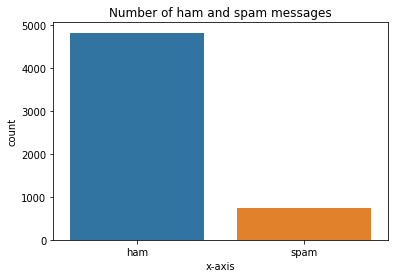**Creating
input vectors and process labels**

In \[10\]:

X **=** df**.**v2

Y **=** df**.**v1

In \[11\]:

le **=** LabelEncoder()

Y **=** le**.**fit\_transform(Y)

In \[12\]:

Y **=** Y**.**reshape(**-**1,1)

**Split the training and testing data**

In \[13\]:

X\_train,X\_test,Y\_train,Y\_test **=**
train\_test\_split(X,Y,test\_size**=**0.20)

**Process the data**

In \[14\]:

max\_words **=** 1000

max\_len **=** 150

In \[15\]:

tok **=** Tokenizer(num\_words**=**max\_words)

tok**.**fit\_on\_texts(X\_train)

In \[16\]:

sequences **=** tok**.**texts\_to\_sequences(X\_train)

sequences\_matrix **=**
sequence**.**pad\_sequences(sequences,maxlen**=**max\_len)

**Creating the model and adding layers**

In \[17\]:

**def** RNN():

inputs **=** Input(name**=**'inputs',shape**=**\[max\_len\])

layer **=** Embedding(max\_words,50,input\_length**=**max\_len)(inputs)

layer **=** LSTM(128)(layer)

layer **=** Dense(256,name**=**'FC1')(layer)

layer **=** Activation('relu')(layer)

layer **=** Dropout(0.5)(layer)

layer **=** Dense(1,name**=**'out\_layer')(layer)

layer **=** Activation('tanh')(layer)

model **=** Model(inputs**=**inputs,outputs**=**layer)

**return** model

In \[18\]:

model **=** RNN()

In \[19\]:

model**.**summary()

Model: "model"

\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_

Layer (type) Output Shape Param \#

=================================================================

inputs (InputLayer) \[(None, 150)\] 0

embedding (Embedding) (None, 150, 50) 50000

lstm (LSTM) (None, 128) 91648

FC1 (Dense) (None, 256) 33024

activation (Activation) (None, 256) 0

dropout (Dropout) (None, 256) 0

out\_layer (Dense) (None, 1) 257

activation\_1 (Activation) (None, 1) 0

=================================================================

Total params: 174,929

Trainable params: 174,929

Non-trainable params: 0

\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_

In \[20\]:

model**.**compile(loss**=**'binary\_crossentropy',optimizer**=**RMSprop(),metrics**=**\['accuracy','mse','mae'\])

**Fit the model**

In \[21\]:

model**.**fit(sequences\_matrix,Y\_train,batch\_size**=**128,epochs**=**100,

validation\_split**=**0.2,callbacks**=**\[EarlyStopping(monitor**=**'val\_loss',min\_delta**=**0.0001)\])

Epoch 1/100

28/28 \[==============================\] - 18s 523ms/step - loss: 0.3450
- accuracy: 0.8836 - mse: 0.0875 - mae: 0.1576 - val\_loss: 0.1204 -
val\_accuracy: 0.9809 - val\_mse: 0.0285 - val\_mae: 0.1097

Epoch 2/100

28/28 \[==============================\] - 13s 475ms/step - loss: 0.0936
- accuracy: 0.9818 - mse: 0.0223 - mae: 0.0968 - val\_loss: 0.0494 -
val\_accuracy: 0.9877 - val\_mse: 0.0171 - val\_mae: 0.0816

Out\[21\]:

In \[22\]:

test\_sequences **=** tok**.**texts\_to\_sequences(X\_test)

test\_sequences\_matrix **=**
sequence**.**pad\_sequences(test\_sequences,maxlen**=**max\_len)

In \[24\]:

acc **=** model**.**evaluate(test\_sequences\_matrix,Y\_test)

35/35 \[==============================\] - 3s 72ms/step - loss: 0.0974 -
accuracy: 0.9839 - mse: 0.0187 - mae: 0.0811

In \[25\]:

print('Test set\\n Loss: {:0.3f}\\n Accuracy:
{:0.3f}'**.**format(acc\[0\],acc\[1\]))

Test set

Loss: 0.097

Accuracy: 0.984

**Saving the model**

In \[26\]:

model**.**save('spam.h5')

**Testing the model**

In \[27\]:

**from** tensorflow.keras.models **import** load\_model

m **=** load\_model('spam.h5')

In \[28\]:

m**.**evaluate(test\_sequences\_matrix, Y\_test)

35/35 \[==============================\] - 3s 70ms/step - loss: 0.0974 -
accuracy: 0.9839 - mse: 0.0187 - mae: 0.0811

Out\[28\]:

\[0.09738346934318542,

0.9838564991950989,

0.01870471052825451,

0.08109962940216064\]